#  Исследование игровых платформ и жанров

### Описание задачи

Из открытых источников доступны исторические данные о продажах игр, оценки пользователей и экспертов, жанры и платформы (например, Xbox или PlayStation). Нужно выявить определяющие успешность игры закономерности. Это позволит сделать ставку на потенциально популярный продукт и спланировать рекламные кампании.
Имею данные до 2016 года. Представим, что сейчас декабрь 2016 г., и вы планируете кампанию на 2017-й.

### План задачи

1) Открыть файл с данными и изучить общую информацию

2) Подготовить данные

3) Провести исследовательский анализ данных

4) Составить портрет пользователя каждого региона

5) Проверьте гипотезы

5.1)Средние пользовательские рейтинги 2-х топовых платформ одинаковые;

5.2)Средние пользовательские рейтинги 2-х топовых жанров равны.

### Описание данных

Name — название игры

Platform — платформа

Year_of_Release — год выпуска

Genre — жанр игры

NA_sales — продажи в Северной Америке (миллионы проданных копий)

EU_sales — продажи в Европе (миллионы проданных копий)

JP_sales — продажи в Японии (миллионы проданных копий)

Other_sales — продажи в других странах (миллионы проданных копий)

Critic_Score — оценка критиков (максимум 100)

User_Score — оценка пользователей (максимум 10)

Rating — рейтинг от организации ESRB (англ. Entertainment Software Rating Board). Эта ассоциация определяет рейтинг компьютерных игр и присваивает им подходящую возрастную категорию.

# 1 Подготовка данных

### Загрузка библиотек

In [3]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns
from scipy import stats as st

### Загрузка и просмотр файла

In [4]:
data = pd.read_csv('/Users/Риндикт/notebook/Новая папка/Gaming_platform_research/games.csv')

In [5]:
data.head(5)

,Name,Platform,Year_of_Release,Genre,NA_sales,EU_sales,JP_sales,Other_sales,Critic_Score,User_Score,Rating
0,Wii Sports,Wii,2006.0,Sports,41.36,28.96,3.77,8.45,76.0,8,E
1,Super Mario Bros.,NES,1985.0,Platform,29.08,3.58,6.81,0.77,NaN,NaN,NaN
2,Mario Kart Wii,Wii,2008.0,Racing,15.68,12.76,3.79,3.29,82.0,8.3,E
3,Wii Sports Resort,Wii,2009.0,Sports,15.61,10.93,3.28,2.95,80.0,8,E
4,Pokemon Red/Pokemon Blue,GB,1996.0,Role-Playing,11.27,8.89,10.22,1.00,NaN,NaN,NaN


In [6]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 16715 entries, 0 to 16714
Data columns (total 11 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   Name             16713 non-null  object 
 1   Platform         16715 non-null  object 
 2   Year_of_Release  16446 non-null  float64
 3   Genre            16713 non-null  object 
 4   NA_sales         16715 non-null  float64
 5   EU_sales         16715 non-null  float64
 6   JP_sales         16715 non-null  float64
 7   Other_sales      16715 non-null  float64
 8   Critic_Score     8137 non-null   float64
 9   User_Score       10014 non-null  object 
 10  Rating           9949 non-null   object 
dtypes: float64(6), object(5)
memory usage: 1.4+ MB


In [7]:
data.isna().sum()

Name                  2
Platform              0
Year_of_Release     269
Genre                 2
NA_sales              0
EU_sales              0
JP_sales              0
Other_sales           0
Critic_Score       8578
User_Score         6701
Rating             6766
dtype: int64

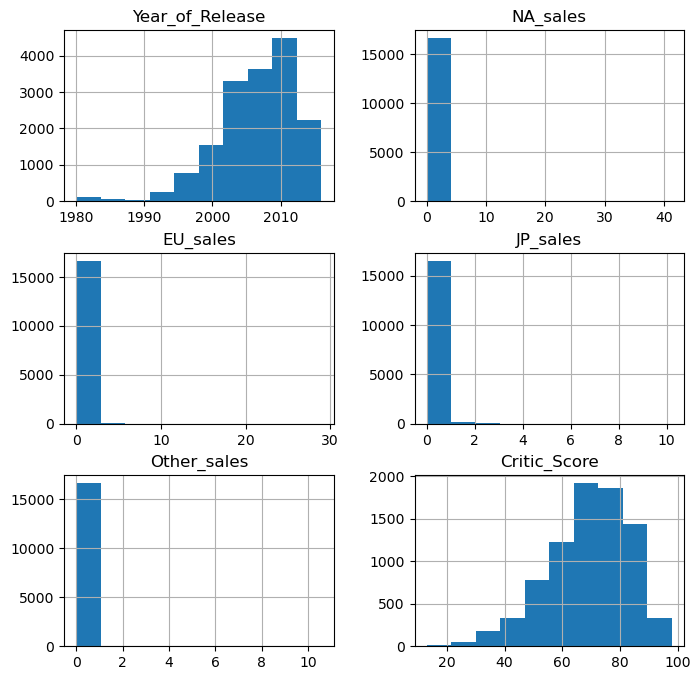

In [8]:
data.hist(figsize = (8,8),bins = 10)
plt.show()

In [9]:
data.duplicated().sum()

0

При просмотре данных были обнаружены пропуски которые нужно обработать

## 2 Подготовка данных

In [10]:
# Привожу к нижнему регистру название столбцов для удобства
data.columns = data.columns.str.lower()

In [11]:
# Убираю пропуски и привожу к удобному типу
data = data.dropna(subset= ['year_of_release'])
data['year_of_release'] = data['year_of_release'].astype(int)

In [12]:
# Создаю столбец с общими продажами
data['all_sales'] = (data['na_sales']+data['eu_sales']+data['jp_sales']+data['other_sales'])

In [13]:
data['user_score'].value_counts()

tbd    2376
7.8     322
8       285
8.2     276
8.3     252
       ... 
1.1       2
1.9       2
9.6       2
0         1
9.7       1
Name: user_score, Length: 96, dtype: int64

In [14]:
data.loc[data['user_score'] == 'tbd', 'user_score'] = np.nan
data['user_score'] = data['user_score'].astype(float)

In [15]:
data['rating'] = data['rating'].fillna('unrated_games')

## Исследовательский анализ данных

### Смотрю в какие годы стали активно производится игры и начали появляться отзывы по ним

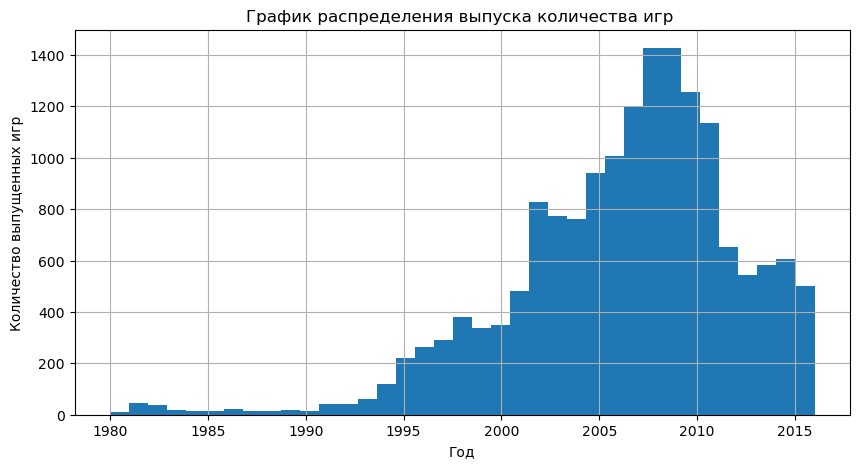

In [16]:
data['year_of_release'].hist( bins= 37, figsize = (10,5))
plt.xlabel('Год')
plt.ylabel('Количество выпущенных игр')
plt.title('График распределения выпуска количества игр ')
plt.show()

Большинство игр появилось после 1995го года

### Смотрю какие платформы самые популярные

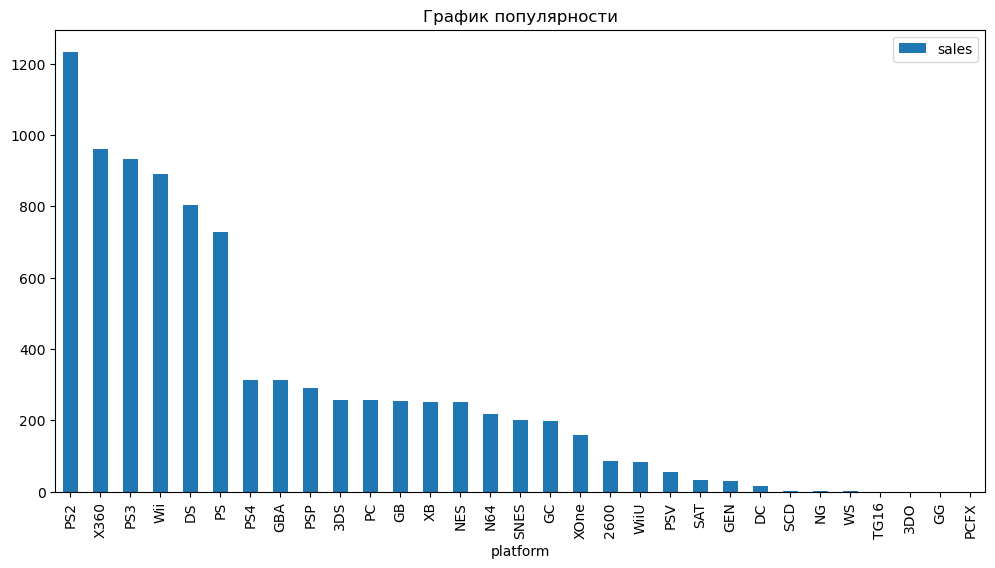

In [17]:
data.groupby('platform').agg(sales = ('all_sales','sum')).sort_values('sales', ascending= False).plot(y='sales',kind = 'bar',figsize = (12,6))
plt.title("График популярности")
plt.show()

### Рассматриваю платформы на графике лет

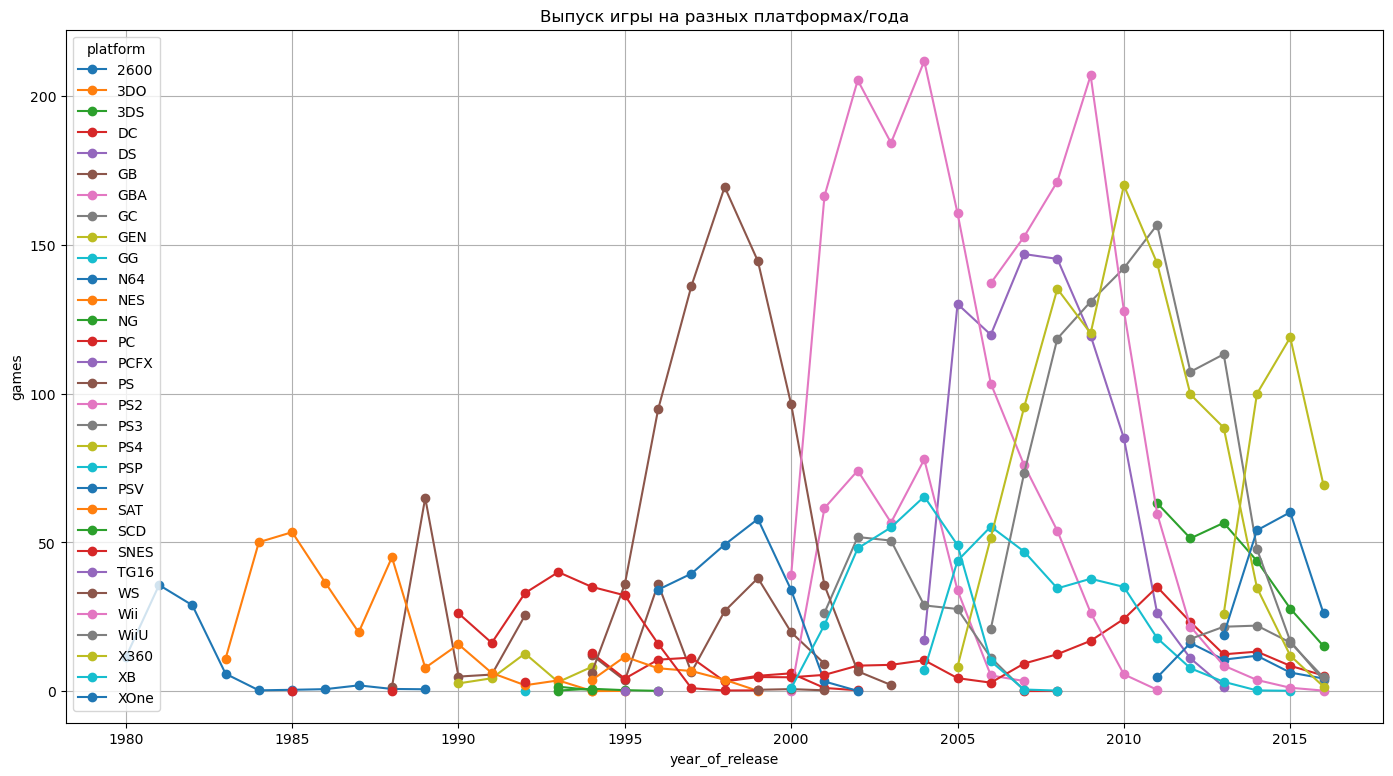

In [18]:
data.pivot_table(index = 'year_of_release',columns = 'platform', values ='all_sales', aggfunc= sum) \
.plot(grid = True,style = '-o', figsize = (17,9))
plt.ylabel("games")
plt.title("Выпуск игры на разных платформах/года")
plt.show()

По графику видно, что больший успех игровой индустрии был в 00х годах, а после 10го виден заметный спад

### Смотрю поближе более актуальный период

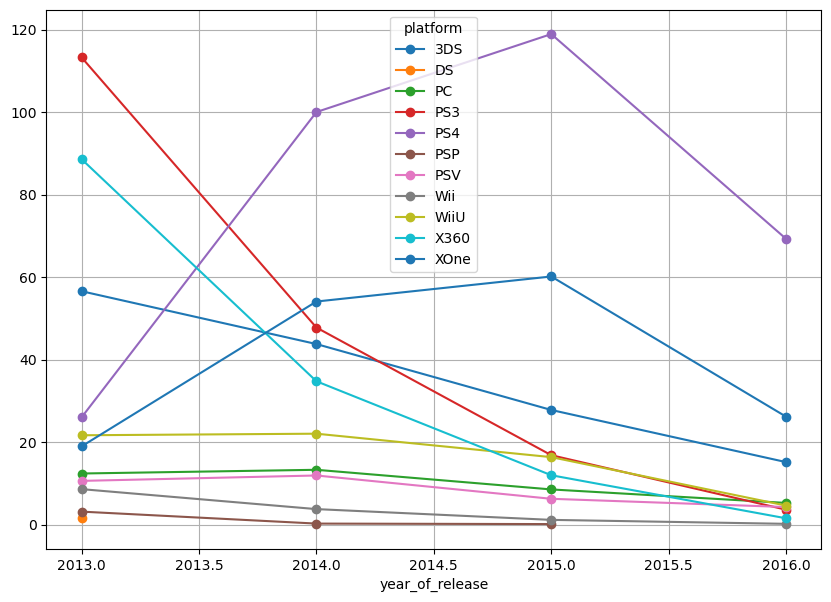

In [19]:
actual_grup = data[data.year_of_release >=2013]
actual_grup.pivot_table(index = 'year_of_release',columns = 'platform', values ='all_sales', aggfunc= sum).plot(figsize = (10,7), grid = True, style = '-o')

plt.show()

Решил отсеять все старые и не актуальные платформы. Но видно спад выручек за игры
х360 хоть и имеет топ выручку, но к 16году поддержка прекращена и снят с производства Wii прекращена поддержка в 13 году так что тоже рассматривать нет смысла
ps4 показывает хорошие продажи и популярность Xbox One тоже довольно молодая и перспективная платформа, Nintendo 3DS имеет неплохие и стабильные показатели + еще не устарела данная модель

### Смотрю диаграмму размаха

Построил диаграмму размаха по всем платформам за актуальный период

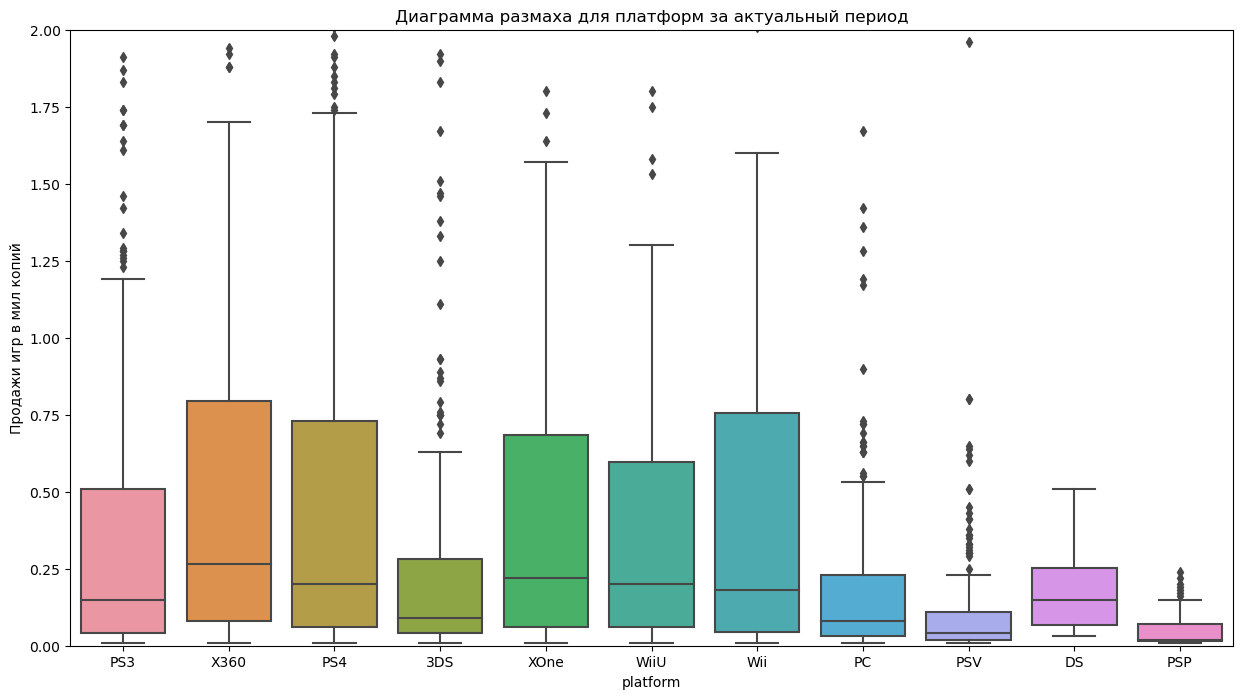

In [20]:
plt.figure(figsize = (15,8))
plt.ylim(0, 2) 
sns.boxplot(data = actual_grup ,x = 'platform', y = 'all_sales').set(title = 'Диаграмма размаха для топ платформ')
plt.ylabel('Продажи игр в мил копий')
plt.title('Диаграмма размаха для платформ за актуальный период')
plt.show()

На данных диаграммах размаха видно:

На первом месте по медийным продажам X360 значение продаж 0.25 миллионов, второе XOne, третье PS4
так же большой размах в пределах нормальных значений так что туда попадают до 0.80 мл копий и у многих платформ есть сильные выбросы

### Смотрю корреляцию

In [21]:
platform = ["PS4","X360","XOne","WiiU",'3DS']
score = ["critic_score","user_score"]

PS4 : 0.41


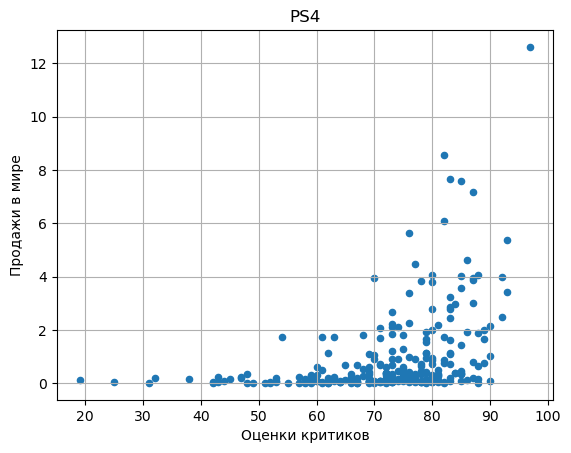

X360 : 0.35


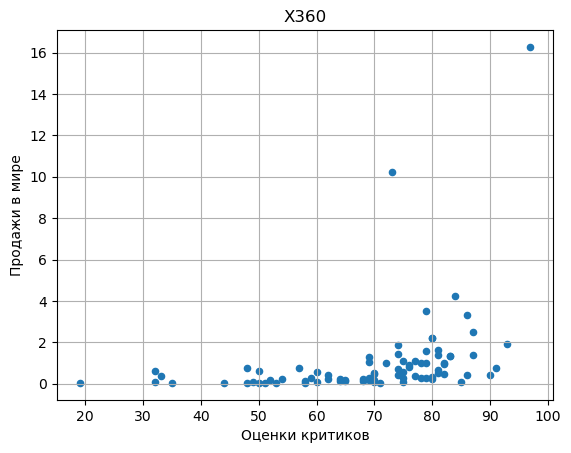

XOne : 0.42


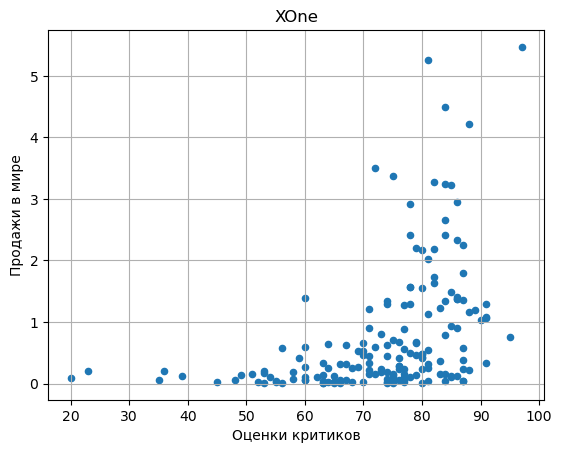

WiiU : 0.38


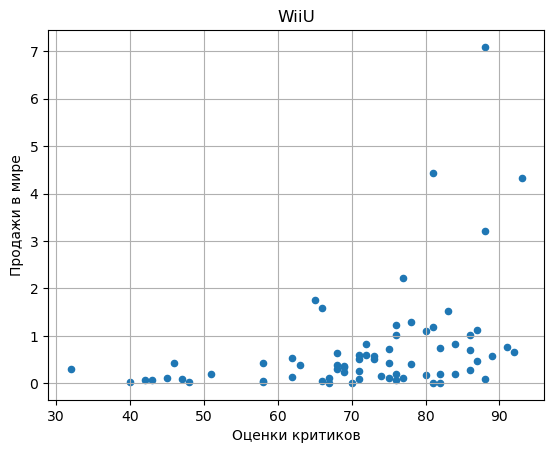

3DS : 0.36


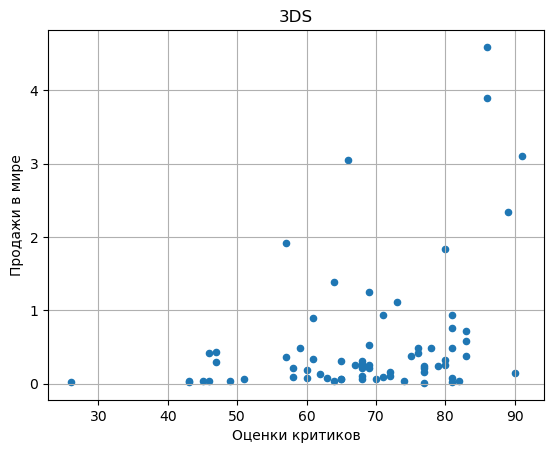

In [22]:
for i in platform:
    cor = actual_grup.query('platform == @i and critic_score>0')
    cor.plot(grid = True,kind = 'scatter',x = 'critic_score', y = 'all_sales')
    plt.title(i)
    plt.ylabel('Продажи в мире')
    plt.xlabel('Оценки критиков')
    print(i,':',round(cor["critic_score"].corr(cor['all_sales']),2))
    plt.show()

Есть зависимость оценки критиков и продажи игр

PS4 : -0.031957110204556424


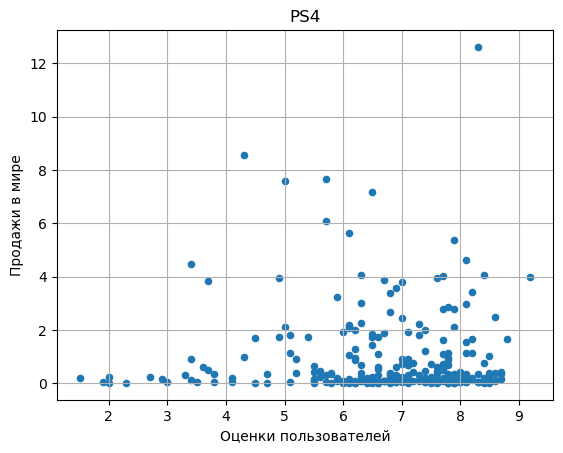

X360 : -0.011742185147181342


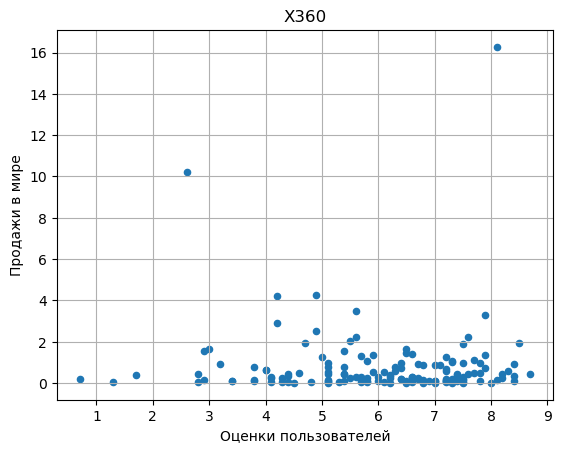

XOne : -0.06892505328279414


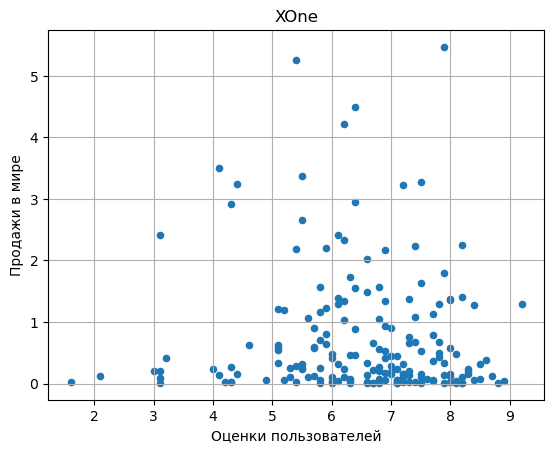

WiiU : 0.4193304819266187


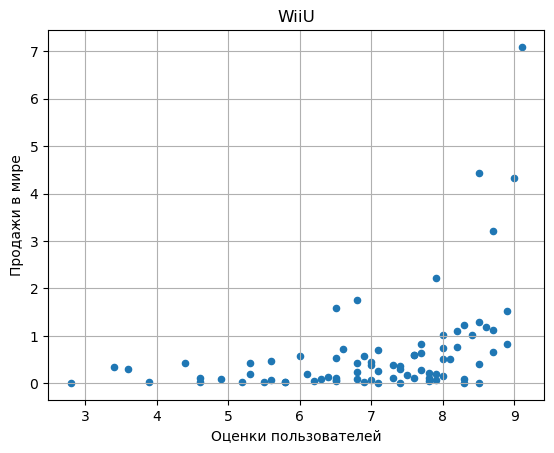

3DS : 0.24150411773563016


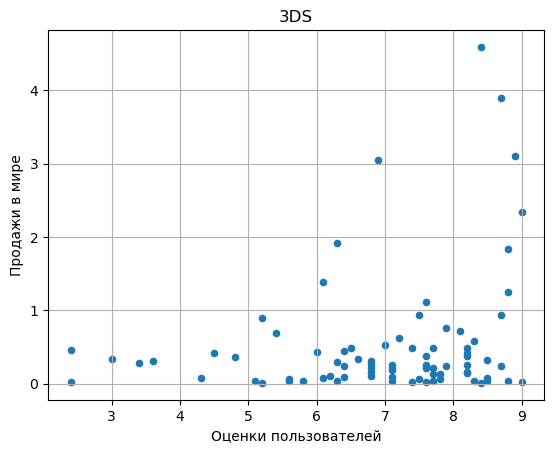

In [23]:
for i in platform:
    cor = actual_grup.query('platform == @i and user_score>0')
    cor.plot(grid = True,kind = 'scatter',x = 'user_score', y = 'all_sales')
    plt.title(i)
    plt.ylabel('Продажи в мире')
    plt.xlabel('Оценки пользователей')
    print(i,':',cor["user_score"].corr(cor['all_sales']))
    plt.show()

Есть не большая зависимость оценки пользователей и продажи игр

### Смотрю какие жанры более популярны

              all_sales   mean
genre                         
Action           321.87  0.110
Shooter          232.98  0.450
Sports           150.65  0.240
Role-Playing     145.89  0.125
Misc              62.82  0.100
Platform          42.63  0.225
Racing            39.89  0.120
Fighting          35.31  0.125
Adventure         23.64  0.030
Simulation        21.76  0.100
Strategy          10.08  0.080
Puzzle             3.17  0.060


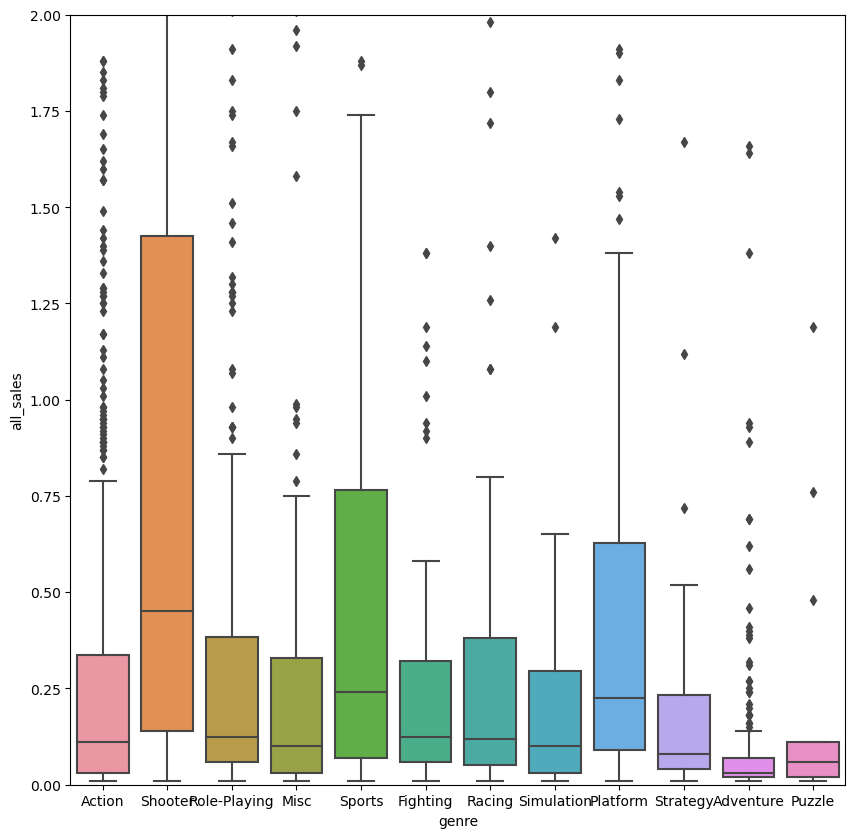

In [24]:
top_actual_grup = actual_grup.groupby('genre') \
.agg(all_sales = ('all_sales','sum'),mean = ('all_sales','median')).sort_values('all_sales',ascending= False)
print(top_actual_grup)
plt.figure(figsize = (10,10))
plt.ylim(0, 2) 
sns.boxplot(data = actual_grup, x ='genre',y = 'all_sales')
plt.show()

Самые большие выручки в мире жанры у Action и Shooter и Sports

Но при этом медийная выручка за игру отличается тут лидирует Shooter с большим отрывом, а следом Sports

Самые маленькие выручки в мире жанры у Puzzle и Strategy

Но у Adventure меньше всего средняя выручка за игру

## Составляю портрет пользователей по регионам

### Европа

In [25]:
print(actual_grup.pivot_table(index = 'genre',values = 'eu_sales',aggfunc='sum').sort_values('eu_sales',ascending= False))
print(actual_grup.pivot_table(index = 'platform',values = 'eu_sales',aggfunc='sum').sort_values('eu_sales',ascending= False).head(5))
actual_grup.pivot_table(index = 'rating',values = 'eu_sales',aggfunc='sum').sort_values('eu_sales',ascending= False)

              eu_sales
genre                 
Action          118.13
Shooter          87.86
Sports           60.52
Role-Playing     36.97
Racing           20.19
Misc             20.04
Platform         15.58
Simulation       10.92
Fighting          8.55
Adventure         8.25
Strategy          4.22
Puzzle            1.00
          eu_sales
platform          
PS4         141.09
PS3          67.81
XOne         51.59
X360         42.52
3DS          30.96


,eu_sales
rating,
M,145.32
E,83.36
unrated_games,78.91
E10+,42.69
T,41.95


В Европейских странах более популярны игры жанров Action, Shooter и Sports, меньше всего популярности имеют Puzzle и Strategy

Самые популярные платформы ps3 и ps4

Игры в рейтингах пользующиеся успехом:

«M» («Mature») — «Для взрослых»: самый популярный

«E» («Everyone») — «Для всех»: тоже является довольно популярным

### Америка

In [26]:
print(actual_grup.pivot_table(index = 'genre',values = 'na_sales',aggfunc='sum').sort_values('na_sales',ascending= False))
print(actual_grup.pivot_table(index = 'platform',values = 'na_sales',aggfunc='sum').sort_values('na_sales',ascending= False).head(5))
actual_grup.pivot_table(index = 'rating',values = 'na_sales',aggfunc='sum').sort_values('na_sales',ascending= False)

              na_sales
genre                 
Action          126.05
Shooter         109.74
Sports           65.27
Role-Playing     46.40
Misc             27.49
Platform         18.14
Fighting         15.55
Racing           12.96
Adventure         7.14
Simulation        4.86
Strategy          3.28
Puzzle            0.83
          na_sales
platform          
PS4         108.74
XOne         93.12
X360         81.66
PS3          63.50
3DS          38.20


,na_sales
rating,
M,165.21
unrated_games,89.42
E,79.05
E10+,54.24
T,49.79


В Северной Америке более популярны игры жанров Action, Shooter и Sports меньше всего популярности имеют Strategy и Adventure

Самые популярные платформы X360 и PS3

«M» («Mature») — «Для взрослых»: самый популярный

«E» («Everyone») — «Для всех»: тоже является довольно популярным

«E10+» («Everyone 10 and older») — «Для всех от 10 лет и старше»: здесь идёт на 3ем месте

### Япония

In [27]:
print(actual_grup.pivot_table(index = 'genre',values = 'jp_sales',aggfunc='sum').sort_values('jp_sales',ascending= False))
print(actual_grup.pivot_table(index = 'platform',values = 'jp_sales',aggfunc='sum').sort_values('jp_sales',ascending= False).head(5))
actual_grup.pivot_table(index = 'rating',values = 'jp_sales',aggfunc='sum').sort_values('jp_sales',ascending= False)

              jp_sales
genre                 
Role-Playing     51.04
Action           40.49
Misc              9.20
Fighting          7.65
Shooter           6.61
Adventure         5.82
Sports            5.41
Platform          4.79
Simulation        4.52
Racing            2.30
Strategy          1.77
Puzzle            1.18
          jp_sales
platform          
3DS          67.81
PS3          23.35
PSV          18.59
PS4          15.96
WiiU         10.88


,jp_sales
rating,
unrated_games,85.05
T,20.59
E,15.14
M,14.11
E10+,5.89


В Японии более популярны игры жанров Role-Playing, Action, меньше всего популярности имеют Puzzle и Strategy так же Shooter который в других странах был в топ 3 по популярности здесь особо интереса не представляет

Самые популярные платформы 3DS и PS3

Жанры:

unrated_games игры, которым не ставила рейтинг организация ESRB(Канада-Амереканская компания) в японии самые популярные

«T» («Teen») — «Подросткам»: идут на ом месте

«E» («Everyone») — «Для всех»: на третьем

Но и Т и Е сильно отстают от без рейтинговых

### Топ жанров в регионах

C:\Users\Риндикт\AppData\Local\Temp\ipykernel_15544\1267209888.py:10: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_i = df_i.append({'genre': 'Other_genre',countries[i]: game_fresh[countries[i]].sum() - df_i[countries[i]].sum()},ignore_index=True)
C:\Users\Риндикт\AppData\Local\Temp\ipykernel_15544\1267209888.py:10: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_i = df_i.append({'genre': 'Other_genre',countries[i]: game_fresh[countries[i]].sum() - df_i[countries[i]].sum()},ignore_index=True)
C:\Users\Риндикт\AppData\Local\Temp\ipykernel_15544\1267209888.py:10: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_i = df_i.append({'genre': 'Other_genre',countries[i]: game_fresh[countries[i]].sum() - df_i[countries[i]].sum()}

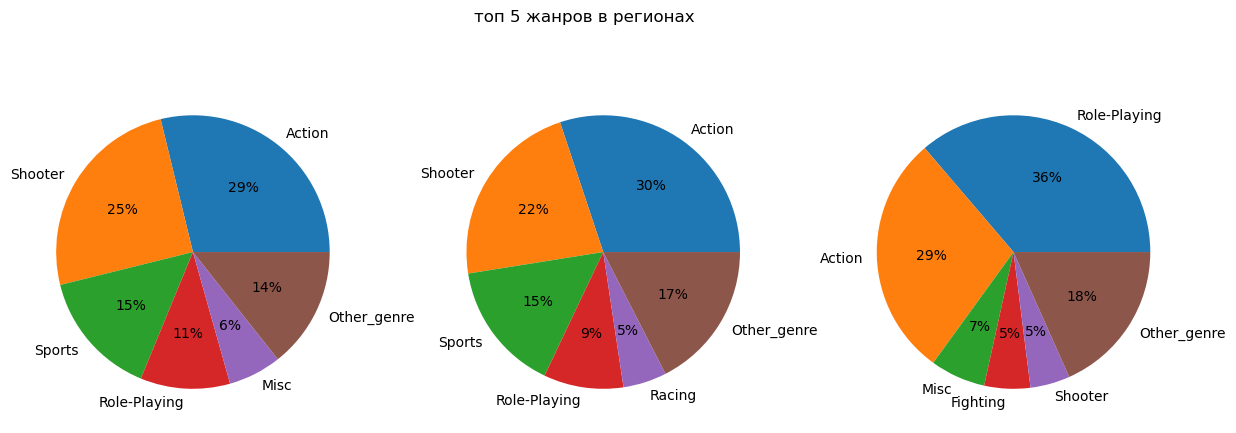

In [28]:
game_fresh = actual_grup.copy()
countries = game_fresh.columns[4:7]

fig, axs = plt.subplots(1,3,figsize = (15,5))
fig.suptitle('топ 5 жанров в регионах')
for i in range(3):
    df_i = (game_fresh.groupby('genre')[countries[i]].sum().
            reset_index().sort_values(countries[i],ascending  = False,ignore_index = True).
            head(5))
    df_i = df_i.append({'genre': 'Other_genre',countries[i]: game_fresh[countries[i]].sum() - df_i[countries[i]].sum()},ignore_index=True)
    axs[i].pie(df_i[countries[i]],labels = df_i['genre'], autopct = '%1.0f%%')

plt.show()

###  Итог

В разных регионах разнятся интересы, как в жанрах, так и в платформах. Жанр популярный везде это Action. Другие жанры в топе меняются самые неинтересные игры это Strategy и Puzzle

Рейтинг ESRB влияет везде популярные игры «M» 1 место в Европе и Америке, а в Японии он уступает «T» и «M» так же «E10+» немного меняет популярность в разных странах Так как ESRB организация для принятия и определение рейтингов для компьютерных видеоигр и другого развлекательного программного обеспечения в США и Канаде, то есть много игр без данного рейтинга в Японии игры без данного рейтинга лидируют

##  Гипотезы 

### Гипотеза №1
####  Средние пользовательские рейтинги платформ Xbox One и PS4 одинаковые

H_0:  Средние пользовательские рейтинги платформ Xbox One и PS4 равны

H_a Средние пользовательские рейтинги платформ Xbox One и PS4 не равны

In [30]:
xbox_one = actual_grup[actual_grup['platform']=="XOne"]['user_score']
PS4 = actual_grup[actual_grup['platform']=="PS4"]['user_score']
xbox_one = xbox_one.dropna()
PS4 = PS4.dropna()
result = st.ttest_ind(xbox_one,PS4,equal_var= False)
alpha = 0.05
print('p-значение:', result.pvalue)

if (result.pvalue<alpha):
    print('Отвергаем нулевую гипотезу')
else:
    print('Не получилось отвергнуть нулевую гипотезу')
    

p-значение: 0.09855299487302606
Не получилось отвергнуть нулевую гипотезу


Значение p-value говорит что это явно слишком большая вероятность что бы отвергнуть гипотезу равенства значений

### Гипотеза №2

#### Средние пользовательские рейтинги жанров Action и Shooter разные.

H_0: Средние пользовательские рейтинги жанров Action и Shooter равны


H_a: Средние пользовательские рейтинги жанров Action и Shooter неравны

In [31]:
action_ganre = actual_grup[actual_grup['genre']=='Action']['user_score']
shooter_ganre = actual_grup[actual_grup['genre']=='Shooter']['user_score']
action_ganre = action_ganre.dropna()
shooter_ganre = shooter_ganre.dropna()

In [32]:
result = st.ttest_ind(action_ganre,shooter_ganre,equal_var= False)
alpha = 0.05
print('p-значение:', result.pvalue)

if result.pvalue<alpha:
    print('Отвергаем нулевую гипотезу')
else:
    print('Не получилось отвергнуть нулевую гипотезу')

p-значение: 0.00032050491803798287
Отвергаем нулевую гипотезу


Значение p-value говорит о том что это явно маленькая вероятность, что бы подтвердить равенства средних значений среди жанров action и shooter таким образом отвергаем нулевую гипотезу

## Общий вывод

Я получил данные по различным платформам начиная с 80х годов, отсеял устаревшие и не актуальные данные, и обнаружил что самые актуальные платформы на данный момент это PS4 и Xbox One, но они довольно молодые и не имеют еще достаточно сборов что бы выделятся так же есть Nintendo 3DS она имеет неплохие и стабильные показатели + еще не устарела данная модель на момент 2016года

Я исследовал как влияет критика на продажу игр, сила влияния меняется от стран в некоторых как в Северной Америке для ps4 и xone она явна и заметна составляет ~0.4 от критиков для 3DS 0.35

Влияние рейтингов игроков имеется, но существенно на WiiU и не сильно 3DS, на остальных платформах оно отсутствует

Проводя исследование так же узнал что популярные жанры тоже могут различаться от региона, но жанр Action всегда есть в топ 3, но тот же Shooter являясь топ жанром в мире в Японии практически не интересен

Основные лидирующее жанры такие 1) Action 2) Shooter 3)RGP 4)Sports по общей выручке, однако по средней продаже 1)Shooter 2)Sports 3) Platform
Подводя итоги я бы рекомендовал игры жанров Shooter и Sports, платформ PS4 и XOne в рейтинге(ESRB) 'M' так как в Америке и Европе он пользуется популярностью в Японии же своя система рейтингом и там популярнее игры из своей системы рейтингов